I encountered some memory issues and needed to split this into part 2. In this Notebook you will see questions 6 and 7 answered.

Import libraries:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Create data path:

In [2]:
# Create data path
path = r"C:\Users\Jason\Instacart Basket Analysis"

In [3]:
# Importing new merged dataframe
df_customer_ords_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
df_customer_ords_merged.shape

(32404859, 32)

In [5]:
df_customer_ords_merged.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Unnamed: 0,First Name,Surname,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [6]:
# Creating an accurate sample for connection between age and family
np.random.seed(4)

In [7]:
# Creating an accurate sample for connection between age and family
dev_2 = np.random.rand(len(df_customer_ords_merged)) <= 0.7

In [8]:
# Creating an accurate sample for connection between age and family
big_2 = df_customer_ords_merged[dev_2]

In [9]:
# Creating an accurate sample for connection between age and family
small_2 = df_customer_ords_merged[~dev_2]

In [10]:
#Reviewing output
len(df_customer_ords_merged)

32404859

In [11]:
#Reviewing output
len(big_2) + len (small_2)

32404859

In [12]:
# Creating 'relevant_columns' variable for the chart
df_relevant_columns_2 = small_2[['Age', 'Number of Dependents']]

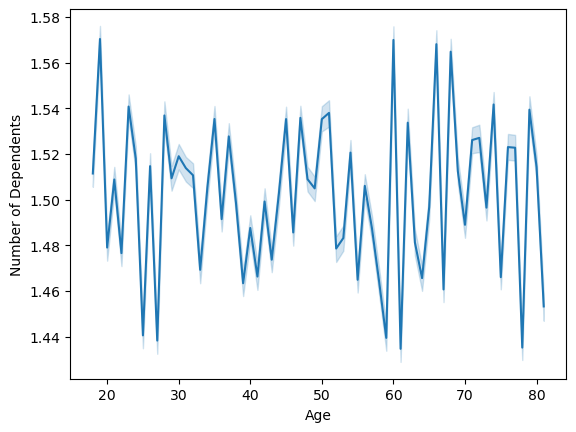

In [13]:
# Creating line chart
line_2 = sns.lineplot(data = df_relevant_columns_2, x = 'Age', y = 'Number of Dependents')

From the line chart, it is hard to see any clear relationship between the variables of age and number of dependents. I think we would need to view other variables to possible find any patterns.

In [14]:
# Exporting images. Second line chart seen in Step 6
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'age_num_of_dependents_line_chart.png'))

In [ ]:
import matplotlib.pyplot as plt9
import pandas as pd

# Step 1: Filter to top 10 products
top_products = df_customer_ords_merged['product_name'].value_counts().head(10).index
filtered_df = df_customer_ords_merged[df_customer_ords_merged['product_name'].isin(top_products)]

# Step 2: Group by Family Status and Product Name
product_counts = filtered_df.groupby(['Family Status', 'product_name']).size().unstack(fill_value=0)

# Optional: Sort products by total purchases for cleaner display
product_counts = product_counts.loc[:, product_counts.sum(axis=0).sort_values(ascending=False).index]

# Step 3: Plot horizontal stacked bar chart
plt9.figure(figsize=(12, 8))
product_counts.T.plot(kind='barh', stacked=True, colormap='tab20')

# Step 4: Customize the plot
plt9.title('Top 10 Products Purchased by Family Status')
plt9.xlabel('Number of Purchases')
plt9.ylabel('Product Name')
plt9.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Prevent layout issues
plt9.tight_layout()

# Step 5: Show the chart
plt9.show()
